In [219]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [29]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)


In [30]:
df = pd.read_csv(r"C:\Users\sreya\Downloads\cltv (1)\customer_purchases.csv")

In [31]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [33]:
def check_df(dataframe):
    print("################ Shape ####################")
    print(dataframe.shape)
    print("############### Columns ###################")
    print(dataframe.columns)
    print("############### Types #####################")
    print(dataframe.dtypes)
    print("############### Head ######################")
    print(dataframe.head())
    print("############### Tail ######################")
    print(dataframe.tail())
    print("############### Describe ###################")
    print(dataframe.describe().T)

check_df(df)

################ Shape ####################
(541909, 8)
############### Columns ###################
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
############### Types #####################
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object
############### Head ######################
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  Customer

In [34]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [35]:
df.dropna(inplace = True)

In [36]:
# Here we can see some of the feature are not in accurate datatype so we have to change that

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID']  = df['CustomerID'].astype('category')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  category      
 7   Country      406829 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 25.8+ MB


In [38]:
df["Description"].nunique()

3885

In [39]:
df["Description"].value_counts().head()   


WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
Name: Description, dtype: int64

In [41]:
# finding the lower and upper limit

def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [42]:
low_limitq,upper_limitq =outlier_thresholds(df, 'Quantity')

In [46]:
count = 0

for i in df['Quantity']:
    if i < low_limitq or i>upper_limitq:
        count=count+1
print('total no of outlier in Quantitiy',count)


# Capping the outliers with lower and upper value
df.loc[(df['Quantity'] < low_limitq), 'Quantity'] = low_limitq
df.loc[(df['Quantity'] < upper_limitq), 'Quantity'] = upper_limitq

total no of outlier in Quantitiy 948


In [47]:
low_limitu,upper_limitu =outlier_thresholds(df, 'UnitPrice')

count = 0

for i in df['UnitPrice']:
    if i < low_limitu or i>upper_limitu:
        count=count+1
print('total no of outlier in UnitPrice',count)

# Capping the outliers with lower and upper value
df.loc[(df['Quantity'] < low_limitu), 'Quantity'] = low_limitu
df.loc[(df['Quantity'] < upper_limitu), 'Quantity'] = upper_limitu

total no of outlier in UnitPrice 846


## Exploratory Data Analysis

### Categorical Variable Analysis

In [58]:
# Finding the cardinality
cat_but_car = [col for col in df.columns if df[col].nunique() > 100 and df[col].dtypes == "O"]
cat_cols = [col for col in df.columns if col not in cat_but_car and df[col].dtypes == "O"]
cat_cols

['Country']

- The dataset has only country variable

In [59]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

In [61]:
cat_summary(df,'Country')

                      Country      Ratio
United Kingdom         361878  88.950886
Germany                  9495   2.333904
France                   8491   2.087118
EIRE                     7485   1.839839
Spain                    2533   0.622620
Netherlands              2371   0.582800
Belgium                  2069   0.508567
Switzerland              1877   0.461373
Portugal                 1480   0.363789
Australia                1259   0.309467
Norway                   1086   0.266943
Italy                     803   0.197380
Channel Islands           758   0.186319
Finland                   695   0.170833
Cyprus                    622   0.152890
Sweden                    462   0.113561
Austria                   401   0.098567
Denmark                   389   0.095618
Japan                     358   0.087998
Poland                    341   0.083819
USA                       291   0.071529
Israel                    250   0.061451
Unspecified               244   0.059976
Singapore       

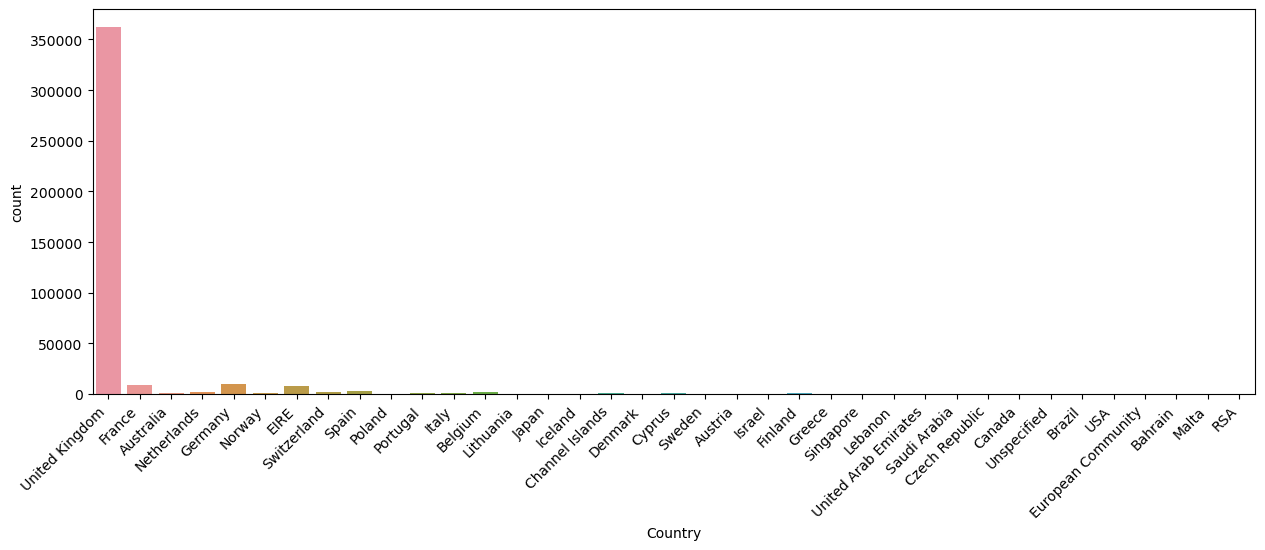

In [65]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=df['Country'], data=df)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

- As we can see UK has the approximate ratio of 89% so we will take only UK data

In [102]:
df = df.query("Country=='United Kingdom'").reset_index(drop=True)

### Numerical variable analysis

In [68]:
df.describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,304.152211,3.460471
std,174.712843,69.315162
min,303.000000,0.000000
25%,303.000000,1.250000
50%,303.000000,1.950000
75%,303.000000,3.750000
max,80995.000000,38970.000000


In [91]:
# Number of unique products
print('Total no of unique products',df['StockCode'].nunique())

Total no of unique products 3684


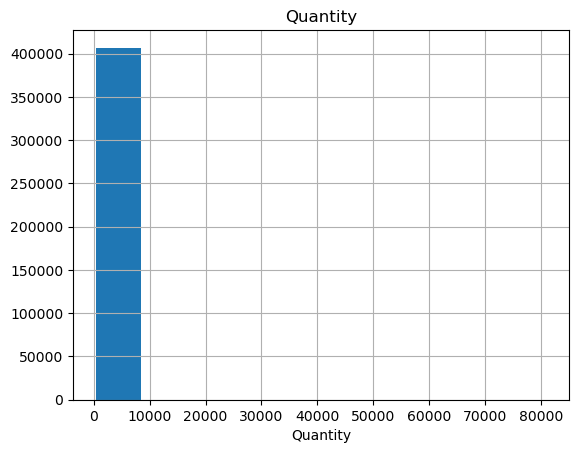

In [84]:
# Plotting the quantity column
df['Quantity'].hist(bins=10)

plt.xlabel('Quantity')
plt.title('Quantity')
plt.show()

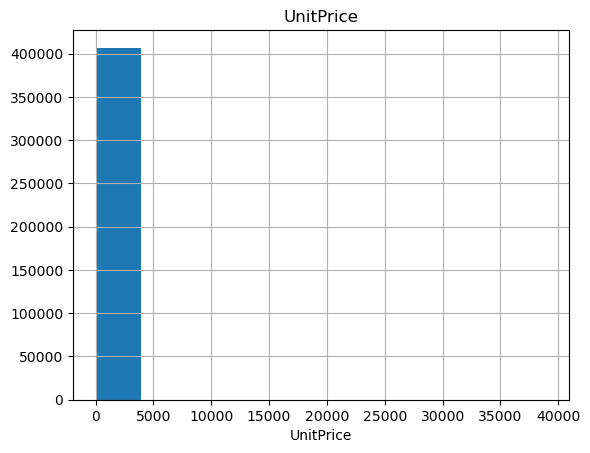

In [85]:
# PLotting the unit price column
df['UnitPrice'].hist(bins=10)

plt.xlabel('UnitPrice')
plt.title('UnitPrice')
plt.show()

In [94]:
# Finding howmany sale done for a specific product
df_product = df.groupby("Description").agg({"Quantity":"count"})
df_product.reset_index(inplace=True)
df_product.sort_values(by="Quantity",ascending=False)


,Description,Quantity
3705,WHITE HANGING HEART T-LIGHT HOLDER,2070
2769,REGENCY CAKESTAND 3 TIER,1905
1760,JUMBO BAG RED RETROSPOT,1662
207,ASSORTED COLOUR BIRD ORNAMENT,1418
2345,PARTY BUNTING,1416
...,...,...
3717,WHITE ROSEBUD PEARL EARRINGS,1
3718,WHITE ROSEBUD & PEARL NECKLACE,1
294,BEADED LOVE HEART JEWELLERY SET,1
2440,PINK CHRISTMAS FLOCK DROPLET,1


- As we can see most selling product is 'WHITE HANGING HEART T-LIGHT HOLDER' and less selling product is 'BLACK CHRISTMAS FLOCK DROPLET'

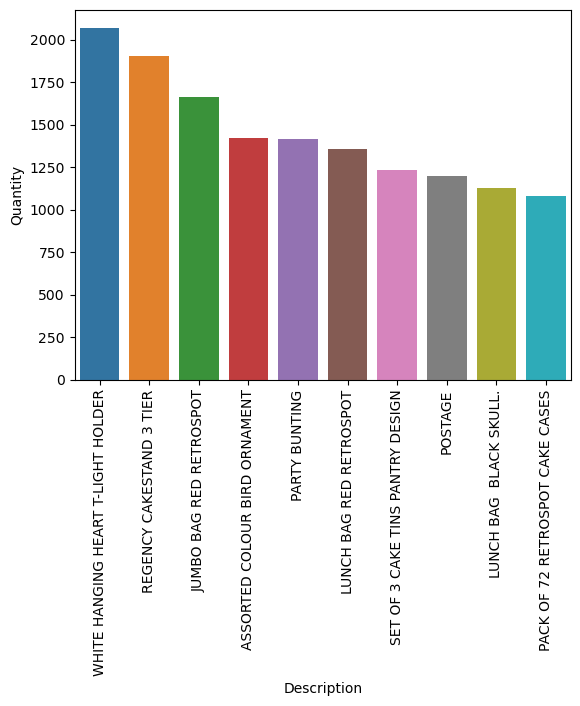

In [98]:
#Finding top 10 most selling products

top_pr= df_product.sort_values(by="Quantity",ascending=False).head(10)

sns.barplot(x="Description", y="Quantity",data=top_pr)
plt.xticks(rotation=90)
plt.show()

In [99]:
# Let's create a total price column using unit price and quantity

df['Total_Price'] = df['UnitPrice'] * df['Quantity']

In [100]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,303.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,772.65
1,536365,71053,WHITE METAL LANTERN,303.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1027.17
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,303.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,833.25
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,303.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1027.17
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,303.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1027.17


## Calculating the RFM metrics

In [107]:
# Calculating the recency
recency_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()

recency_df['Recency'] = (max(df['InvoiceDate']) - recency_df['InvoiceDate']).dt.days

In [109]:
recency_df.describe()

,Recency
count,3950.000000
mean,90.778481
std,100.230349
min,0.000000
25%,16.000000
50%,49.000000
75%,142.000000
max,373.000000


In [123]:
# Calculating the monetary value

monetary_df = df.groupby('CustomerID')['Total_Price'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'monetary']

In [113]:
monetary_df.describe()

,Total_Price
count,4.372000e+03
mean,8.178172e+04
std,3.343080e+05
min,0.000000e+00
25%,9.966428e+03
50%,3.206952e+04
75%,8.071390e+04
max,1.253703e+07


In [114]:
# Calculating the frequency value

frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()


In [115]:
frequency_df

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,0
2,12348.0,0
3,12349.0,0
4,12350.0,0
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


In [116]:
# Changing the column name to frequency
frequency_df.columns = ['CustomerID', 'Frequency']

In [117]:
frequency_df.describe()

,Frequency
count,4372.000000
mean,4.541857
std,8.417788
min,0.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,224.000000


In [124]:
# Here I am merging all the RFM dataframes on 'CustomerID' column

rfm_df = recency_df.merge(frequency_df, on = 'CustomerID').merge(monetary_df, on = 'CustomerID')

In [125]:
# We don't need invoice date column I am just removing it
rfm_df.drop(columns=['InvoiceDate'], inplace = True)

In [126]:
rfm_df

,CustomerID,Recency,Frequency,monetary
0,12346.0,325.0,2,77498.72
1,12347.0,NaN,0,0.00
2,12348.0,NaN,0,0.00
3,12349.0,NaN,0,0.00
4,12350.0,NaN,0,0.00
...,...,...,...,...
4367,18280.0,277.0,1,14437.95
4368,18281.0,180.0,1,11926.08
4369,18282.0,7.0,3,18992.04
4370,18283.0,3.0,16,369941.79


In [135]:
# Here I am segmenting all the score and assigning him with a label from 1-5

# recency_score
rfm_df["recency_score"] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
# frequency_score
rfm_df["frequency_score"] = pd.qcut(rfm_df["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
# monetary_score
rfm_df["monetary_score"] = pd.qcut(rfm_df["monetary"], 5, labels=[1, 2, 3, 4, 5])

# RFM Score
rfm_df["RFM_SCORE"] = (rfm_df["recency_score"].astype(str) + rfm_df["frequency_score"].astype(str))

In [136]:
rfm_df

,CustomerID,Recency,Frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
0,12346.0,325.0,2,77498.72,1,2,4,12
1,12347.0,NaN,0,0.00,NaN,1,1,nan1
2,12348.0,NaN,0,0.00,NaN,1,1,nan1
3,12349.0,NaN,0,0.00,NaN,1,1,nan1
4,12350.0,NaN,0,0.00,NaN,1,1,nan1
...,...,...,...,...,...,...,...,...
4367,18280.0,277.0,1,14437.95,1,2,2,12
4368,18281.0,180.0,1,11926.08,1,2,2,12
4369,18282.0,7.0,3,18992.04,5,4,2,54
4370,18283.0,3.0,16,369941.79,5,5,5,55


In [152]:
df.groupby('CustomerID')['InvoiceDate'].nunique()

CustomerID
12346.0     2
12347.0     0
12348.0     0
12349.0     0
12350.0     0
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Name: InvoiceDate, Length: 4372, dtype: int64

In [157]:
df['InvoiceDate'].mean()

Timestamp('2011-07-10 23:48:12.301493760')

In [158]:
# Here I am taking the mean date and calculating the churn rate

churn_period_end = pd.to_datetime('2011-07-10')
last_purchase_date = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()

churned_customers = last_purchase_date[last_purchase_date['InvoiceDate'] < churn_period_end]

initial_customers = df['CustomerID'].nunique()
churned_count = churned_customers['CustomerID'].nunique()
churn_rate = (churned_count / initial_customers) * 100


In [233]:
rfm_df['Recency'].fillna(0,inplace = True)

In [234]:
rfm_data = rfm_df[['Recency', 'Frequency', 'monetary']]

In [238]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rfm_data)

In [ ]:
inertia = []

# Determine the optimal number of clusters (k) using the Elbow Method
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(rfm_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method to visualize the optimal k
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [242]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=5, random_state=42)

In [243]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [244]:
# Adding cluster labels to the original dataset
rfm_df['Cluster'] = clusters

In [245]:
# Evaluating cluster quality using silhouette score
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {silhouette_avg}')



Silhouette Score: 0.6055320760880641


In [206]:
# Calculate the average CLTV for each cluster
cltv_clusters = rfm_df.groupby('Cluster')['CLTV'].mean()
print('Average CLTV per Cluster:')
print(cltv_clusters)


Average CLTV per Cluster:
Cluster
0    1.857204e+07
1    1.857204e+07
2    1.857204e+07
3    1.857204e+07
4    1.857204e+07
Name: CLTV, dtype: float64


### References
- kaggle.com
- Medium.com
- github